# **K-Nearest Neighbors(KNN) Algorithm**

# Objectives

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

# Here's an visualization of the K-Nearest Neighbors algorithm

![knn](https://miro.medium.com/v2/resize:fit:1400/0*jqxx3-dJqFjXD6FA)

In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.

In this sense, it is important to consider the value of k. Hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.


## Algorithm of KNN

1. **Load Data**
2. **Initialize the K-value**, where K must be an odd number.
3. For each sample in the training data:
    - Calculate the distance between the query point and the cluster point.
    - Add the distance and the index of the example to an ordered collection.
4. Sort the distance-ordered collection from smaller to larger.
5. Get the labels of the selected K entries:
    - **If Regression Problem**: Return the mean of the labels.
    - **If Classification Problem**: Return the mode (most frequent label).

## Applications of KNN

### 1. **Classification**
- Image Recommendation.
- Text Classification.
- Sentiment Analysis.

### 2. **Regression**
- Predict Continuous Values.
- Housing Price Prediction.
- Age Group Prediction.

### 3. **Anomaly Detection**
- KNN can identify outliers in the dataset and easily remove anomalies across multiple columns.

### 4. **Recommendation Systems**
- KNN can be used in collaborative filtering-based recommender systems. By finding similar users or items based on their preferences, KNN can suggest relevant items or users to a given user.

## Advantages of the KNN Algorithm

- Simple to Implement.
- Robust to Noisy Training Data.
- Effective for Large Datasets.

## Disadvantages of the KNN Algorithm

- Determining the optimal value of K can be complex.
- **High Computation Cost** due to the need to calculate distances between the query point and all training samples.


In [16]:
#Importing the libraries
import pandas as pd
import numpy as np

In [2]:
# Installing seaborn (this step may not be necessary if seaborn is already installed)
import piplite
await piplite.install("seaborn")

# Importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying plots inline in Jupyter/Colab notebooks
%matplotlib inline

In [3]:
#importing warnings
import warnings
warnings.filterwarnings("ignore")

**Load Data from CSV File**

In [4]:
# Reading the Dataset
df=pd.read_csv("User_Data.csv")

In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
# The following command returns the number of rows and columns in the DataFrame 'df'.
# It is useful to quickly check the size of your dataset.

df.shape  # Returns a tuple (number_of_rows, number_of_columns

(400, 5)

In [7]:
# The following command generates descriptive statistics for all the numerical columns in the DataFrame 'df'
# It helps you quickly summarize the distribution and central tendency of the data.

df.describe()  # Returns summary statistics for numerical columns in the DataFrame

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
# The following command provides a summary of the DataFrame 'df'.
# It includes the column names, data types, and the number of non-null entries for each column.

df.info()  # Returns a summary of the DataFrame, including column data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


# Extracting Independent and Dependent Variables

The following code snippet extracts independent and dependent variables from a DataFrame:

In [9]:
#Extracting Independent and dependent Variable  
X= df.iloc[:, [2,3]].values  
y= df.iloc[:, 4].values  

**Explanation:**

- **`x = df.iloc[:, [2, 3]].values`**: 
  - This line selects columns 2 and 3 (the third and fourth columns) from the DataFrame as the independent variables (features) and converts them into a 2D NumPy array, `x`.

- **`y = df.iloc[:, 4].values`**: 
  - This line selects column 4 (the fifth column) as the dependent variable (target) and converts it into a 1D NumPy array, `y`.

**Summary:**

- **Independent Variables (`x`)**: The input features used for making predictions.
- **Dependent Variable (`y`)**: The output or target variable that you are trying to predict or model.


# Model Building

**Splitting the dataset into train and test set**



We need to split our dataset into training and testing sets. We’ll perform this by importing train_test_split from sklearn.model_selection library. It is usually good to keep 70% of the data in your train dataset and the rest 30% in your test dataset.

In [10]:
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Print the shape of the training and test sets
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (300, 2) (300,)
Test set: (100, 2) (100,)


# Classification: K-Nearest Neighbors (KNN)

**Import Library**

To implement the K-Nearest Neighbors (KNN) classifier, we need to import the `KNeighborsClassifier` class from the `scikit-learn` library:


In [11]:
# Importing KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Creating the K-NN classifier object
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)


**Fitting K-NN Classifier to the Training Data**

Now we will fit the K-NN classifier to the training data. To do this, we will import the `KNeighborsClassifier` class from the Scikit-learn library. After importing the class, we will create an instance of the classifier. The parameters of this class will be:

- **`n_neighbors`**: Defines the number of neighbors the algorithm will consider. The default value is usually 5.
- **`metric='minkowski'`**: This is the default parameter and determines the distance metric used to calculate the distance between data points.
- **`p=2`**: This parameter specifies the power parameter for the Minkowski distance. When `p=2`, it is equivalent to the standard Euclidean metric.

After setting up the classifier, we will fit it to the training data. Below is the code for it:

In [12]:
# Fit the classifier to the training data
classifier.fit(X_train, y_train)

KNeighborsClassifier()

**Predicting**

We can use the model to make predictions on the test set:


In [13]:
#Predicting the test set result  
y_pred= classifier.predict(X_test) 
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

# Creating the Confusion Matrix

The confusion matrix is a performance measurement tool for classification models. It provides a summary of prediction results by comparing the actual and predicted classifications. It helps evaluate the accuracy of a classifier and provides insight into the types of errors it makes.


In [14]:
# Importing confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix using the actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print(cm)

[[59  9]
 [ 8 24]]


# Data Visulaization

**Visualizing the Training Set Results**

Visualizing the results of a machine learning model helps to understand how well the model performs on the training data and how it classifies different classes. For a K-Nearest Neighbors (K-NN) classifier, visualization can show the decision boundary between different classes and where individual training points are located.


X_train shape: (300, 2)
x1 shape: (100, 100)
x2 shape: (100, 100)
Input to predict shape: (10000, 2)
Z shape before reshaping: (10000,)
Z shape after reshaping: (100, 100)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


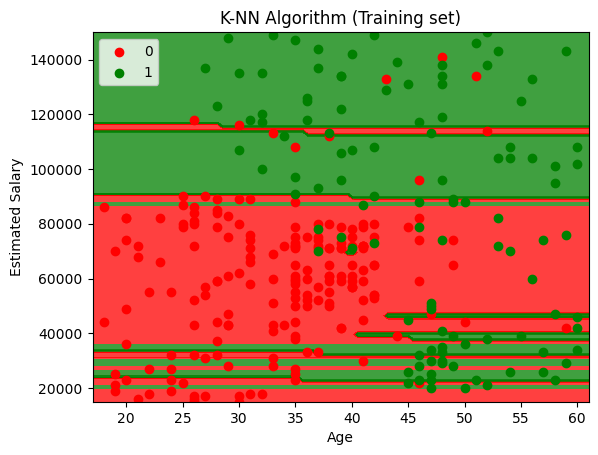

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Ensure X_train is a 2D array with two features
print("X_train shape:", X_train.shape)

# Create the mesh grid
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

x1, x2 = np.meshgrid(
    np.linspace(x1_min, x1_max, 100),
    np.linspace(x2_min, x2_max, 100)
)

print("x1 shape:", x1.shape)
print("x2 shape:", x2.shape)

# Prepare input for prediction
input_to_predict = np.c_[x1.ravel(), x2.ravel()]
print("Input to predict shape:", input_to_predict.shape)

# Make predictions
Z = classifier.predict(input_to_predict)
print("Z shape before reshaping:", Z.shape)

Z = Z.reshape(x1.shape)
print("Z shape after reshaping:", Z.shape)

# Plot the contour
plt.contourf(x1, x2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Plot the training data points
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('K-NN Algorithm (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
